In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
# from numba import jit

from utils import *


%load_ext autoreload
%autoreload 2


"Detection of periodic driving in nonautonomous difference equations"

In [ ]:
np.sum(np.abs(pp2 - pp1))

0.0

In [ ]:
guide_attractor[None, ...].shape

(1, 2998, 3)

In [ ]:
guide_attractor[:, None, :].shape

(2998, 1, 3)

In [ ]:
.shape

(4, 2998, 2998, 3)

In [ ]:
.shape

(4, 1, 2998, 3)

In [ ]:
np.percentile(np.ravel(dist_mat), 1)

0.13563132050675042

In [ ]:
0.005 * 10 * 2

0.1

In [ ]:
np.percentile(np.ravel(dist_mat), 1)

0.1780797383489919

In [213]:
neighbors ~ eps^3

noise ~ neighbors ?
noise ~ eps

array([0.001     , 0.00127427, 0.00162378, 0.00206914, 0.00263665,
       0.00335982, 0.00428133, 0.00545559, 0.00695193, 0.00885867,
       0.01128838, 0.0143845 , 0.01832981, 0.02335721, 0.02976351,
       0.0379269 , 0.0483293 , 0.06158482, 0.078476  , 0.1       ])

In [ ]:
np.mean(dist_mat_min)**3

In [235]:
k_neighbors = 5
volume_eps = (4/3) * np.pi * eps**3
local_dist = np.mean(np.sort(dist_mat_min, axis=0)[:k_neighbors])
point_density = k_neighbors / (4/3) * np.pi * local_dist**3
expected_neighbors = point_density * volume_eps

In [234]:
noise_distance = 0.1
volume_noise = (4/3) * np.pi * noise_distance**3


0.03715835938420876

In [20]:
# 
eps_vals = np.logspace(-5, -1, 10)
nu_vals = np.logspace(-5, 0, 30)
#eps = 0.001

start_vals = list()
end_vals = list()

turn_vals = list()

all_tolerance_vals = list()

for eps in eps_vals:

    fraction_neighbors = list()
    tolerance_vals = list()
    for nu_val in nu_vals:
        guide_attractor = np.copy(all_attractors[-1]) 
        guide_attractor += nu_val * (np.random.random(guide_attractor.shape) - 0.5)

        dist_mat = np.sqrt(
            np.sum(
                (guide_attractor[None, ...] - guide_attractor[:, None, :])**2, 
                axis=-1
            )
        )
        dist_mat_bin = np.copy(dist_mat < eps).astype(int)
        frac_n = np.sum(dist_mat_bin) / float(dist_mat_bin.size)
        fraction_neighbors.append(frac_n)
        
        #tolerance_vals.append(np.sqrt(np.median((np.diff(guide_attractor, axis=0))**2)))
        #tolerance_vals.append(np.mean(np.abs((np.diff(guide_attractor, axis=0))**2)))
        #tolerance_vals.append(np.sqrt(np.mean((np.diff(guide_attractor, axis=0))**2)))
        #tolerance_vals.append(np.mean(dist_mat**2))
        #tolerance_vals.append(np.std(np.diff(guide_attractor, axis=0)))
        
        tolerance_vals.append(np.percentile(np.ravel(dist_mat), 1))
#         fvals, psd = periodogram(guide_attractor[:, 0], fs=1)
#         halflen = int(len(guide_attractor[:, 0])/2)
#         tolerance_vals.append(psd[halflen])
    
    all_tolerance_vals.append(tolerance_vals)
#     tolerance_vals.append(np.std((np.diff(guide_attractor, axis=0))**2))
#     tolerance_vals.append(np.mean(np.abs((anp.diff(guide_attractor, axis=0))**2)))

#     halflen = int(len(guide_attractor[:, 0])/2)
#     fvals, psd = periodogram(guide_attractor[:, 0], fs=1)
#     tolerance_vals.append(psd)

    #tolerance_vals.append(np.mean(dist_mat**2))
    
    tolerance_vals.append(np.std(np.diff(guide_attractor[:, 0])))

    turn_vals.append(nu_vals[np.argmin(np.diff(fraction_neighbors))])
    start_vals.append(fraction_neighbors[0])
    end_vals.append(fraction_neighbors[-1])
    plt.loglog(nu_vals, fraction_neighbors, '.')

KeyboardInterrupt: 

In [468]:
data = np.random.random((1000, 8))
ww1 = hankel_matrix(data[:, 0], 3)

ww = hankel_matrix(data, 3)

In [ ]:
# standardize all time series
# pick a fixed epsilon tolerance

In [ ]:
epsilon="auto"

epsilon (float | "auto"): Set an explicit neighbor radius, or estimate one using 
    high-frequency variation within the input data

0.3880381814234462

In [393]:
np.percentile(np.ravel(np.ravel(dist_mat)), 1)

0.21107082116811063

(array([1.698060e+05, 9.715920e+05, 1.927152e+06, 2.306154e+06,
        1.901910e+06, 1.139368e+06, 4.594820e+05, 1.011480e+05,
        1.086000e+04, 5.320000e+02]),
 array([0.        , 0.26425892, 0.52851783, 0.79277675, 1.05703566,
        1.32129458, 1.58555349, 1.84981241, 2.11407132, 2.37833024,
        2.64258915]),
 <BarContainer object of 10 artists>)

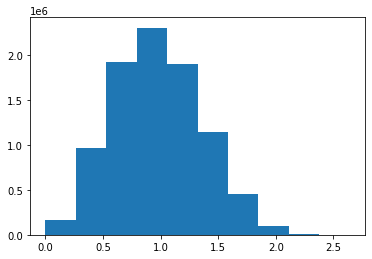

In [391]:
plt.hist(np.ravel(dist_mat))

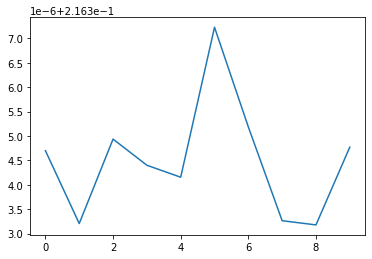

In [412]:
plt.plot([item[0] for item in all_tolerance_vals])

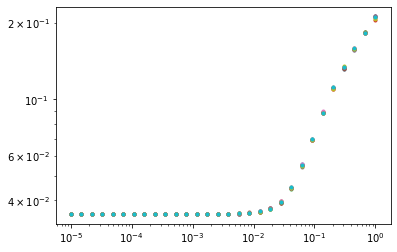

In [417]:
for item in all_tolerance_vals:
    plt.loglog(nu_vals, item[:-1], '.')

In [280]:
from scipy.signal import periodogram

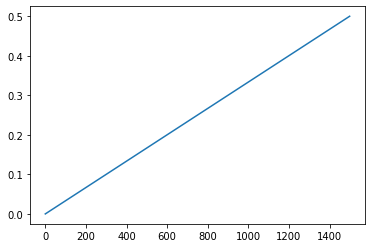

In [286]:
plt.plot(fvals)

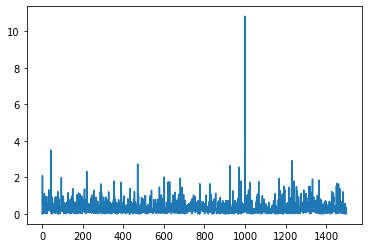

In [285]:
plt.plot(psd)

array([2.37473972e-30, 9.59177301e-02, 2.08789154e+00, ...,
       3.78266727e-01, 3.27400793e-02, 8.66408819e-02])

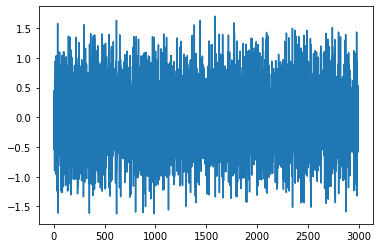

In [274]:
plt.plot(np.diff(guide_attractor, axis=0)[:, 0])

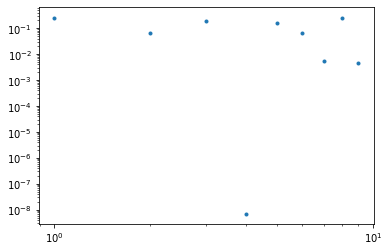

In [292]:
plt.figure()
plt.loglog(tolerance_vals, '.')

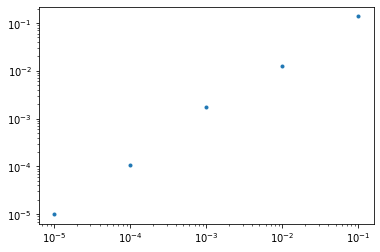

In [267]:
plt.figure()
plt.loglog(eps_vals, turn_vals, '.')

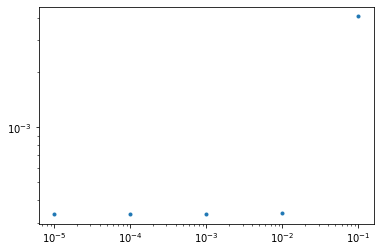

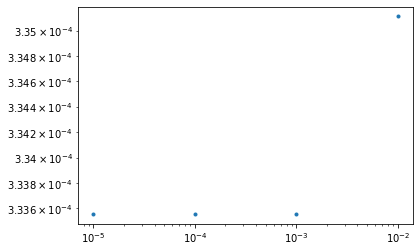

In [262]:
plt.figure()
plt.loglog(eps_vals, start_vals, '.')

plt.figure()
plt.loglog(eps_vals[:-1], end_vals[:-1], '.')

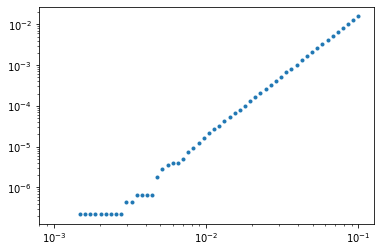

In [226]:
eps_vals = np.logspace(-3, -1, 60)
fraction_neighbors = list()
for eps in eps_vals:
    dist_mat_bin = np.copy(dist_mat_min < eps).astype(int)
    frac_n = np.sum(dist_mat_bin) / float(dist_mat_bin.size)
    fraction_neighbors.append(frac_n)
    
plt.loglog(eps_vals, fraction_neighbors, '.')

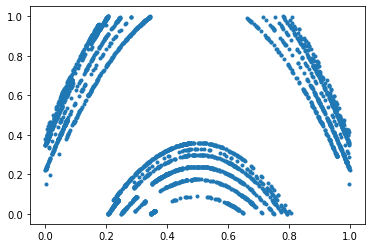

In [ ]:
plt.plot(guide_attractor_set[0][:, 0], guide_attractor_set[0][:, 1],'.')
# plt.plot(guide_attractor[:, 0] + 0.05*np.random.random(guide_attractor[:, 0].shape), 
#          guide_attractor[:, 1]+ 0.05*np.random.random(guide_attractor[:, 0].shape),
#          '.')

In [ ]:
### Make a dist_mat object corresponding to the closest approach at any point?




# propagate the fibers

# recurrence epsilon: provides evidence that a set of indices lies on a fiber
# pooling: combine all recurrences together

# Alternative: a voting rule: 
# an index only lies on the fiber if it occurs in at least x% of the time relative to random chance

# correlation sum: the fraction of pairs whose distance is smaller than r


What is the union-find operation doing? It's associating indices which might not otherwise associate. So it's different than a clustering on the distance matrix
+ If i and k co-occur at a time t, and k and j co-occur at a time t', then i, j, k will end up in the same equivalence class, regardless of t - t' 
+ The other neighbors of a point are like the features
+ so want to define a fuzzy set

Machine learning for set assignment: is this just classification of each index?


The next step will be classifying indices based on an unordered set of set barcodes


Newman-Girvan is very expensive for large graphs. What about Louvain?

In [ ]:
sparsity(dist_mat_bin)

0.9746252894413487

In [ ]:
aa = adjmat_from_associations(dist_mat_bin)
sparsity(aa)

0.8255735088680424

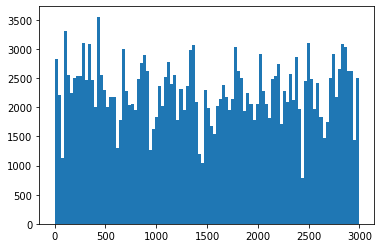

In [ ]:
all_wheres = list()
for item in dist_mat_bin:
    all_wheres.append(np.where(item)[0])
plt.hist(np.hstack(all_wheres), 100);

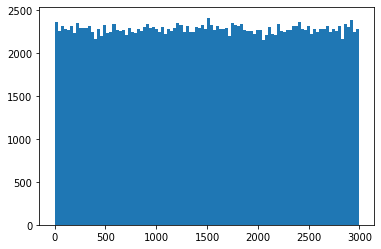

In [ ]:
random_mat = (np.random.random(dist_mat_bin.shape) > sparsity(dist_mat_bin)).astype(int)
sparsity(random_mat)

all_wheres = list()
for item in random_mat:
    all_wheres.append(np.where(item)[0])
plt.hist(np.hstack(all_wheres), 100);

In [ ]:
naive_sparsity = 1 - (n * ave_clique_links)/n**2
print(naive_sparsity)

0.04936624416277513


In [ ]:
log(prob_selected) = log(ave_clique_links) - 2log(n)
# log(prob_not_selected) = log(1 - prob_selected**n)
log(prob_not_selected) = - prob_selected**n # stirling
log(expected_zeros) = 2 log(n) + log(prob_not_selected)
log_expected_sparsity = log(expected_zeros) - 2 log(n)



1.0

In [ ]:
pval = 1 - sparsity(dist_mat_bin) # probabilty of an element being one
n = dist_mat_bin.shape[0]
ave_nodes_row = int(n * pval)
ave_clique_links = int((1/2) * ave_nodes_row * (ave_nodes_row - 1))

prob_selected = 2 * ave_clique_links / (n * (n-1))
prob_not_selected = (1 - prob_selected)**n # perform n replicates
# expected_zeros = n**2 * prob_not_selected
expected_sparsity = prob_not_selected

print(expected_sparsity)

0.08891608157497513


79

In [196]:
random_mat = np.zeros_like(dist_mat_bin)
for i in range(n):
    nodes_row = np.random.randint(ave_nodes_row - 20, ave_nodes_row + 20)
    qq = itertools.combinations(
        np.random.choice(range(n), 
                         nodes_row, 
                         replace=False
                        ), 2)
    for p, q in qq:
        random_mat[p, q] = 1
        random_mat[q, p] = 1
        
#     for j in range(ave_clique_links):
#         q = np.random.randint(n)
#         p = np.random.randint(q, n)
#         random_mat[p, q] = 1
#         random_mat[q, p] = 1
        
sparsity(random_mat)

0.1463045632823483

In [202]:
all_node_counts = list()
for row in dist_mat_bin:
    nn = np.sum(row)
    all_node_counts.append(nn * (nn - 1) / 2)
print(np.mean(all_node_counts))
print(np.median(all_node_counts))

3625.447631754503
2485.0


In [203]:
ave_clique_links

2850

In [184]:
qq = itertools.combinations(
        np.random.choice(range(n), 
                         ave_nodes_row, 
                         replace=False
                        ), 2)
print(len(list(qq)))
print(ave_clique_links)

2850
2850


In [185]:
2850/n**2

0.0003170893114867328

In [ ]:
np.min([1, 3, 4,5, np.inf])

1.0

In [10]:
class ListNode:
    def __init__(self, val=0, nxt=None):
        self.val = val
        self.next = nxt

        
def make_linked_list(a):
    dummy = ListNode()
    out = ListNode(a[0])
    dummy.next = out
    for item in a[1:]:
        print(item)
        node = ListNode(item)
        out.next = node
        out = out.next
    return dummy.next

def print_list(head0):
    head = ListNode() # copy
    head.next = head0
    while head:
        print(head.val, end=" ")
        head = head.next


aa = [1,4,5,3,8,9]
qq = make_linked_list(aa)
        
print_list(qq) 

4
5
3
8
9
0 1 4 5 3 8 9 